<a href="https://colab.research.google.com/github/ninjaa1234/Learning_New/blob/main/Machine_Learning/K_Means_Clustering_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![picture](https://drive.google.com/uc?export=view&id=1TiZ0k1tOz19z6FptHj6lkxdqq9HO5g24)

![picture](https://drive.google.com/uc?export=view&id=1Mu-NbOzj2_vW_mIdd0yPgvcHjsSHfCDQ)

![picture](https://drive.google.com/uc?export=view&id=1W3RuE9LggtrIc1hacUjNHRTseOCgjz8O)

In [3]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


#Data Visualistaion

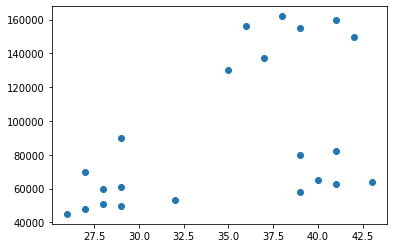

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.Age,df["Income($)"])

#K Mean

In [6]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
km_predicted=km.fit_predict(df[['Age','Income($)']])
km_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [8]:
df["cluster"]=km_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


<function matplotlib.pyplot.legend>

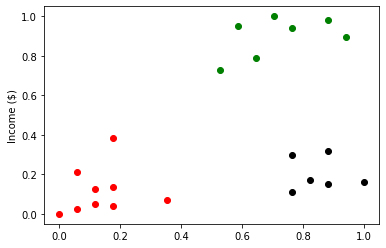

In [46]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.ylabel('Income ($)')

plt.legend

#To scale X axis and Y axis

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df

scaler.fit(df[["Age"]])
df['Age']=scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [48]:
km=KMeans(n_clusters=3)
km_predicted=km.fit_predict(df[['Age','Income($)']])
km_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [49]:
df['cluster']=km_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [50]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

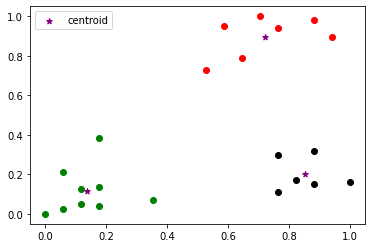

In [51]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
###############[all rows,1st column]###########[all roes, 2ndcolumn]###########3
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.legend()

#Elbow Plot Method

In [52]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age',"Income($)"]])
    sse.append(km.inertia_)

In [53]:
sse

[5.434011511988176,
 2.091136388699076,
 0.4750783498553094,
 0.34910470944195643,
 0.2621792762345213,
 0.22020960864009395,
 0.1729962193245546,
 0.13265419827245162,
 0.10383752586603559]

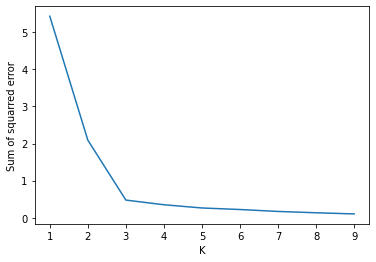

In [44]:
plt.xlabel('K')
plt.ylabel('Sum of squarred error')
plt.plot(k_rng,sse)

In [45]:
#see we have elbow to be 3
#just as 3 cluster centers